## 迁移学习
- 通过经典网络已经在大数据量下训练好的模型迁移到相似小数据量任务上

![caption](img/1.PNG)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# 照片数据加载小妙招
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # 这一行注释掉就是使用gpu，不注释就是使用cpu

In [1]:
# 解压数据

In [1]:
! unzip ./data.zip -d ./
! unzip ./dataset.zip -d ./
! unzip ./original_dataset.zip -d ./

Archive:  ./data.zip
   creating: ./data/
  inflating: ./data/train.txt        
   creating: ./data/cats_and_dogs/
   creating: ./data/cats_and_dogs/validation/
   creating: ./data/cats_and_dogs/validation/dogs/
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2273.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2230.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2327.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2477.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2197.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2497.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2177.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2344.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2154.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2424.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2365.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2236.jpg  
  inflat

  inflating: ./data/cats_and_dogs/validation/dogs/dog.2391.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2449.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2160.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2106.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2151.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2303.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2359.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2306.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2152.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2175.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2271.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2370.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2100.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2439.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2287.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/validation/dogs/dog.2456.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2398.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2115.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2490.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2208.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2102.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2047.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2433.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2117.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2489.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2075.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2464.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2363.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2289.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2225.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/validation/dogs/dog.2428.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2018.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2288.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2387.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2470.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2176.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2121.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2093.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2263.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2133.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2495.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2140.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2453.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2450.jpg  
  inflating: ./data/cats_and_dogs/validation/dogs/dog.2214.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/validation/cats/cat.2488.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2274.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2061.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2368.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2093.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2229.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2338.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2324.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2040.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2089.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2394.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2352.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2280.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2045.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2447.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/validation/cats/cat.2349.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2042.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2301.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2452.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2208.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2200.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2250.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2272.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2302.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2477.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2060.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2126.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2455.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2305.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2311.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/validation/cats/cat.2281.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2118.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2456.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2364.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2404.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2285.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2254.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2351.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2354.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2046.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2304.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2412.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2249.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2406.jpg  
  inflating: ./data/cats_and_dogs/validation/cats/cat.2402.jpg  
  inflating: ./data/cats_

  inflating: ./data/cats_and_dogs/train/dogs/dog.589.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.360.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.394.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.505.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.996.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.907.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.528.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.670.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.595.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.465.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.763.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.27.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.560.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.631.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.623.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.881.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.318.jpg 

  inflating: ./data/cats_and_dogs/train/dogs/dog.226.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.265.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.384.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.919.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.813.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.860.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.212.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.254.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.762.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.725.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.216.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.675.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.594.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.756.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.407.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.574.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.655.jpg

  inflating: ./data/cats_and_dogs/train/dogs/dog.268.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.982.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.330.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.448.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.64.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.501.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.184.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.524.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.621.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.867.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.103.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.418.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.116.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.399.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.986.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.88.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.533.jpg  

  inflating: ./data/cats_and_dogs/train/dogs/dog.944.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.823.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.428.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.49.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.776.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.464.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.774.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.713.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.562.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.47.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.266.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.830.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.10.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.532.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.139.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.780.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.376.jpg  


  inflating: ./data/cats_and_dogs/train/dogs/dog.160.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.672.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.449.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.953.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.288.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.1.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.659.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.857.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.16.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.364.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.747.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.392.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.307.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.39.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.660.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.911.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.444.jpg  
 

  inflating: ./data/cats_and_dogs/train/dogs/dog.758.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.499.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.20.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.767.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.851.jpg  
  inflating: ./data/cats_and_dogs/train/dogs/dog.77.jpg  
   creating: ./data/cats_and_dogs/train/cats/
  inflating: ./data/cats_and_dogs/train/cats/cat.759.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.662.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.208.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.597.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.442.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.44.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.978.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.152.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.658.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.284.jpg  
  inflating: 

  inflating: ./data/cats_and_dogs/train/cats/cat.579.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.538.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.626.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.130.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.733.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.256.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.355.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.148.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.827.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.746.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.749.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.28.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.463.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.222.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.824.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.455.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.213.jpg 

  inflating: ./data/cats_and_dogs/train/cats/cat.467.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.398.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.97.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.491.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.944.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.834.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.409.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.81.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.36.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.551.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.825.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.794.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.975.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.317.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.226.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.88.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.374.jpg  
 

  inflating: ./data/cats_and_dogs/train/cats/cat.777.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.129.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.217.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.950.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.29.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.252.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.77.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.872.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.756.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.920.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.136.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.992.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.742.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.481.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.364.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.685.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.993.jpg  

  inflating: ./data/cats_and_dogs/train/cats/cat.880.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.504.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.667.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.632.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.951.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.866.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.485.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.810.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.596.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.854.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.926.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.607.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.238.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.714.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.801.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.644.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.781.jpg

  inflating: ./data/cats_and_dogs/train/cats/cat.153.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.396.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.776.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.576.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.282.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.449.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.507.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.212.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.390.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.997.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.562.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.260.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.502.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.886.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.676.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.666.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.202.jpg

  inflating: ./data/cats_and_dogs/train/cats/cat.495.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.601.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.509.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.302.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.642.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.664.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.286.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.760.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.315.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.650.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.349.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.541.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.331.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.922.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.289.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.952.jpg  
  inflating: ./data/cats_and_dogs/train/cats/cat.982.jpg

  inflating: ./dataset/train/dogs/dogs_00042.jpg  
  inflating: ./dataset/train/dogs/dogs_00398.jpg  
  inflating: ./dataset/train/dogs/dogs_00725.jpg  
  inflating: ./dataset/train/dogs/dogs_00389.jpg  
  inflating: ./dataset/train/dogs/dogs_00852.jpg  
  inflating: ./dataset/train/dogs/dogs_00275.jpg  
  inflating: ./dataset/train/dogs/dogs_00587.jpg  
  inflating: ./dataset/train/dogs/dogs_00273.jpg  
  inflating: ./dataset/train/dogs/dogs_00923.jpg  
  inflating: ./dataset/train/dogs/dogs_00532.jpg  
  inflating: ./dataset/train/dogs/dogs_00076.jpg  
  inflating: ./dataset/train/dogs/dogs_00862.jpg  
  inflating: ./dataset/train/dogs/dogs_00857.jpg  
  inflating: ./dataset/train/dogs/dogs_00944.jpg  
  inflating: ./dataset/train/dogs/dogs_00529.jpg  
  inflating: ./dataset/train/dogs/dogs_00478.jpg  
  inflating: ./dataset/train/dogs/dogs_00520.jpg  
  inflating: ./dataset/train/dogs/dogs_00849.jpg  
  inflating: ./dataset/train/dogs/dogs_00797.jpg  
  inflating: ./dataset/train/do

  inflating: ./dataset/train/dogs/dogs_00707.jpg  
  inflating: ./dataset/train/dogs/dogs_00150.jpg  
  inflating: ./dataset/train/dogs/dogs_00755.jpg  
  inflating: ./dataset/train/dogs/dogs_00047.jpg  
  inflating: ./dataset/train/dogs/dogs_00801.jpg  
  inflating: ./dataset/train/dogs/dogs_00448.jpg  
  inflating: ./dataset/train/dogs/dogs_00816.jpg  
  inflating: ./dataset/train/dogs/dogs_00162.jpg  
  inflating: ./dataset/train/dogs/dogs_00022.jpg  
  inflating: ./dataset/train/dogs/dogs_00360.jpg  
  inflating: ./dataset/train/dogs/dogs_00525.jpg  
  inflating: ./dataset/train/dogs/dogs_00571.jpg  
  inflating: ./dataset/train/dogs/dogs_00560.jpg  
  inflating: ./dataset/train/dogs/dogs_00281.jpg  
  inflating: ./dataset/train/dogs/dogs_00716.jpg  
  inflating: ./dataset/train/dogs/dogs_00604.jpg  
  inflating: ./dataset/train/dogs/dogs_00303.jpg  
  inflating: ./dataset/train/dogs/dogs_00751.jpg  
  inflating: ./dataset/train/dogs/dogs_00337.jpg  
  inflating: ./dataset/train/do

  inflating: ./dataset/train/dogs/dogs_00544.jpg  
  inflating: ./dataset/train/dogs/dogs_00693.jpg  
  inflating: ./dataset/train/dogs/dogs_00320.jpg  
  inflating: ./dataset/train/dogs/dogs_00675.jpg  
  inflating: ./dataset/train/dogs/dogs_00843.jpg  
  inflating: ./dataset/train/dogs/dogs_00622.jpg  
  inflating: ./dataset/train/dogs/dogs_00918.jpg  
  inflating: ./dataset/train/dogs/dogs_00349.jpg  
  inflating: ./dataset/train/dogs/dogs_00671.jpg  
  inflating: ./dataset/train/dogs/dogs_00455.jpg  
  inflating: ./dataset/train/dogs/dogs_00546.jpg  
  inflating: ./dataset/train/dogs/dogs_00703.jpg  
  inflating: ./dataset/train/dogs/dogs_00565.jpg  
  inflating: ./dataset/train/dogs/dogs_00058.jpg  
  inflating: ./dataset/train/dogs/dogs_00960.jpg  
  inflating: ./dataset/train/dogs/dogs_00949.jpg  
  inflating: ./dataset/train/dogs/dogs_00794.jpg  
  inflating: ./dataset/train/dogs/dogs_00475.jpg  
  inflating: ./dataset/train/dogs/dogs_00982.jpg  
  inflating: ./dataset/train/do

  inflating: ./dataset/train/dogs/dogs_00497.jpg  
  inflating: ./dataset/train/dogs/dogs_00369.jpg  
  inflating: ./dataset/train/dogs/dogs_00897.jpg  
  inflating: ./dataset/train/dogs/dogs_00249.jpg  
  inflating: ./dataset/train/dogs/dogs_00190.jpg  
  inflating: ./dataset/train/dogs/dogs_00842.jpg  
  inflating: ./dataset/train/dogs/dogs_00787.jpg  
  inflating: ./dataset/train/dogs/dogs_00924.jpg  
  inflating: ./dataset/train/dogs/dogs_00947.jpg  
  inflating: ./dataset/train/dogs/dogs_00806.jpg  
  inflating: ./dataset/train/dogs/dogs_00903.jpg  
  inflating: ./dataset/train/dogs/dogs_00201.jpg  
  inflating: ./dataset/train/dogs/dogs_00420.jpg  
  inflating: ./dataset/train/dogs/dogs_00254.jpg  
  inflating: ./dataset/train/dogs/dogs_00779.jpg  
  inflating: ./dataset/train/dogs/dogs_00335.jpg  
  inflating: ./dataset/train/dogs/dogs_00841.jpg  
  inflating: ./dataset/train/dogs/dogs_00356.jpg  
  inflating: ./dataset/train/dogs/dogs_00988.jpg  
  inflating: ./dataset/train/do

  inflating: ./dataset/train/cats/cats_00412.jpg  
  inflating: ./dataset/train/cats/cats_00238.jpg  
  inflating: ./dataset/train/cats/cats_00553.jpg  
  inflating: ./dataset/train/cats/cats_00182.jpg  
  inflating: ./dataset/train/cats/cats_00354.jpg  
  inflating: ./dataset/train/cats/cats_00360.jpg  
  inflating: ./dataset/train/cats/cats_00974.jpg  
  inflating: ./dataset/train/cats/cats_00439.jpg  
  inflating: ./dataset/train/cats/cats_00800.jpg  
  inflating: ./dataset/train/cats/cats_00079.jpg  
  inflating: ./dataset/train/cats/cats_00074.jpg  
  inflating: ./dataset/train/cats/cats_00332.jpg  
  inflating: ./dataset/train/cats/cats_00062.jpg  
  inflating: ./dataset/train/cats/cats_00917.jpg  
  inflating: ./dataset/train/cats/cats_00990.jpg  
  inflating: ./dataset/train/cats/cats_00596.jpg  
  inflating: ./dataset/train/cats/cats_00449.jpg  
  inflating: ./dataset/train/cats/cats_00566.jpg  
  inflating: ./dataset/train/cats/cats_00318.jpg  
  inflating: ./dataset/train/ca

  inflating: ./dataset/train/cats/cats_00176.jpg  
  inflating: ./dataset/train/cats/cats_00683.jpg  
  inflating: ./dataset/train/cats/cats_00610.jpg  
  inflating: ./dataset/train/cats/cats_00085.jpg  
  inflating: ./dataset/train/cats/cats_00297.jpg  
  inflating: ./dataset/train/cats/cats_00915.jpg  
  inflating: ./dataset/train/cats/cats_00874.jpg  
  inflating: ./dataset/train/cats/cats_00666.jpg  
  inflating: ./dataset/train/cats/cats_00827.jpg  
  inflating: ./dataset/train/cats/cats_00587.jpg  
  inflating: ./dataset/train/cats/cats_00767.jpg  
  inflating: ./dataset/train/cats/cats_00770.jpg  
  inflating: ./dataset/train/cats/cats_01000.jpg  
  inflating: ./dataset/train/cats/cats_00479.jpg  
  inflating: ./dataset/train/cats/cats_00761.jpg  
  inflating: ./dataset/train/cats/cats_00075.jpg  
  inflating: ./dataset/train/cats/cats_00929.jpg  
  inflating: ./dataset/train/cats/cats_00393.jpg  
  inflating: ./dataset/train/cats/cats_00049.jpg  
  inflating: ./dataset/train/ca

  inflating: ./dataset/train/cats/cats_00607.jpg  
  inflating: ./dataset/train/cats/cats_00912.jpg  
  inflating: ./dataset/train/cats/cats_00854.jpg  
  inflating: ./dataset/train/cats/cats_00476.jpg  
  inflating: ./dataset/train/cats/cats_00123.jpg  
  inflating: ./dataset/train/cats/cats_00050.jpg  
  inflating: ./dataset/train/cats/cats_00914.jpg  
  inflating: ./dataset/train/cats/cats_00014.jpg  
  inflating: ./dataset/train/cats/cats_00781.jpg  
  inflating: ./dataset/train/cats/cats_00344.jpg  
  inflating: ./dataset/train/cats/cats_00788.jpg  
  inflating: ./dataset/train/cats/cats_00170.jpg  
  inflating: ./dataset/train/cats/cats_00496.jpg  
  inflating: ./dataset/train/cats/cats_00057.jpg  
  inflating: ./dataset/train/cats/cats_00539.jpg  
  inflating: ./dataset/train/cats/cats_00598.jpg  
  inflating: ./dataset/train/cats/cats_00597.jpg  
  inflating: ./dataset/train/cats/cats_00726.jpg  
  inflating: ./dataset/train/cats/cats_00038.jpg  
  inflating: ./dataset/train/ca

  inflating: ./dataset/train/cats/cats_00229.jpg  
  inflating: ./dataset/train/cats/cats_00275.jpg  
  inflating: ./dataset/train/cats/cats_00301.jpg  
  inflating: ./dataset/train/cats/cats_00763.jpg  
  inflating: ./dataset/train/cats/cats_00615.jpg  
  inflating: ./dataset/train/cats/cats_00665.jpg  
  inflating: ./dataset/train/cats/cats_00868.jpg  
  inflating: ./dataset/train/cats/cats_00408.jpg  
  inflating: ./dataset/train/cats/cats_00950.jpg  
  inflating: ./dataset/train/cats/cats_00632.jpg  
  inflating: ./dataset/train/cats/cats_00839.jpg  
  inflating: ./dataset/train/cats/cats_00414.jpg  
  inflating: ./dataset/train/cats/cats_00358.jpg  
  inflating: ./dataset/train/cats/cats_00215.jpg  
  inflating: ./dataset/train/cats/cats_00452.jpg  
  inflating: ./dataset/train/cats/cats_00304.jpg  
  inflating: ./dataset/train/cats/cats_00803.jpg  
  inflating: ./dataset/train/cats/cats_00795.jpg  
  inflating: ./dataset/train/cats/cats_00094.jpg  
  inflating: ./dataset/train/ca

  inflating: ./dataset/train/cats/cats_00816.jpg  
  inflating: ./dataset/train/cats/cats_00140.jpg  
  inflating: ./dataset/train/cats/cats_00225.jpg  
  inflating: ./dataset/train/cats/cats_00843.jpg  
  inflating: ./dataset/train/cats/cats_00080.jpg  
  inflating: ./dataset/train/cats/cats_00066.jpg  
  inflating: ./dataset/train/cats/cats_00221.jpg  
  inflating: ./dataset/train/cats/cats_00366.jpg  
  inflating: ./dataset/train/cats/cats_00205.jpg  
  inflating: ./dataset/train/cats/cats_00348.jpg  
  inflating: ./dataset/train/cats/cats_00750.jpg  
  inflating: ./dataset/train/cats/cats_00831.jpg  
  inflating: ./dataset/train/cats/cats_00631.jpg  
  inflating: ./dataset/train/cats/cats_00073.jpg  
  inflating: ./dataset/train/cats/cats_00362.jpg  
  inflating: ./dataset/train/cats/cats_00006.jpg  
  inflating: ./dataset/train/cats/cats_00559.jpg  
  inflating: ./dataset/train/cats/cats_00132.jpg  
  inflating: ./dataset/train/cats/cats_00568.jpg  
  inflating: ./dataset/train/ca

  inflating: ./dataset/train/panda/panda_00904.jpg  
  inflating: ./dataset/train/panda/panda_00911.jpg  
  inflating: ./dataset/train/panda/panda_00260.jpg  
  inflating: ./dataset/train/panda/panda_00835.jpg  
  inflating: ./dataset/train/panda/panda_00436.jpg  
  inflating: ./dataset/train/panda/panda_00113.jpg  
  inflating: ./dataset/train/panda/panda_00825.jpg  
  inflating: ./dataset/train/panda/panda_00158.jpg  
  inflating: ./dataset/train/panda/panda_00223.jpg  
  inflating: ./dataset/train/panda/panda_00846.jpg  
  inflating: ./dataset/train/panda/panda_00580.jpg  
  inflating: ./dataset/train/panda/panda_00038.jpg  
  inflating: ./dataset/train/panda/panda_00971.jpg  
  inflating: ./dataset/train/panda/panda_00002.jpg  
  inflating: ./dataset/train/panda/panda_00307.jpg  
  inflating: ./dataset/train/panda/panda_00992.jpg  
  inflating: ./dataset/train/panda/panda_00543.jpg  
  inflating: ./dataset/train/panda/panda_00020.jpg  
  inflating: ./dataset/train/panda/panda_00106

  inflating: ./dataset/train/panda/panda_00677.jpg  
  inflating: ./dataset/train/panda/panda_00392.jpg  
  inflating: ./dataset/train/panda/panda_00725.jpg  
  inflating: ./dataset/train/panda/panda_00891.jpg  
  inflating: ./dataset/train/panda/panda_00619.jpg  
  inflating: ./dataset/train/panda/panda_00079.jpg  
  inflating: ./dataset/train/panda/panda_00546.jpg  
  inflating: ./dataset/train/panda/panda_00306.jpg  
  inflating: ./dataset/train/panda/panda_00269.jpg  
  inflating: ./dataset/train/panda/panda_00152.jpg  
  inflating: ./dataset/train/panda/panda_00950.jpg  
  inflating: ./dataset/train/panda/panda_00016.jpg  
  inflating: ./dataset/train/panda/panda_00176.jpg  
  inflating: ./dataset/train/panda/panda_00894.jpg  
  inflating: ./dataset/train/panda/panda_00413.jpg  
  inflating: ./dataset/train/panda/panda_00132.jpg  
  inflating: ./dataset/train/panda/panda_00469.jpg  
  inflating: ./dataset/train/panda/panda_00838.jpg  
  inflating: ./dataset/train/panda/panda_00100

  inflating: ./dataset/train/panda/panda_00160.jpg  
  inflating: ./dataset/train/panda/panda_00335.jpg  
  inflating: ./dataset/train/panda/panda_00974.jpg  
  inflating: ./dataset/train/panda/panda_00614.jpg  
  inflating: ./dataset/train/panda/panda_00646.jpg  
  inflating: ./dataset/train/panda/panda_00937.jpg  
  inflating: ./dataset/train/panda/panda_00078.jpg  
  inflating: ./dataset/train/panda/panda_00409.jpg  
  inflating: ./dataset/train/panda/panda_00563.jpg  
  inflating: ./dataset/train/panda/panda_00395.jpg  
  inflating: ./dataset/train/panda/panda_00719.jpg  
  inflating: ./dataset/train/panda/panda_00449.jpg  
  inflating: ./dataset/train/panda/panda_00102.jpg  
  inflating: ./dataset/train/panda/panda_00722.jpg  
  inflating: ./dataset/train/panda/panda_00515.jpg  
  inflating: ./dataset/train/panda/panda_00244.jpg  
  inflating: ./dataset/train/panda/panda_00650.jpg  
  inflating: ./dataset/train/panda/panda_00555.jpg  
  inflating: ./dataset/train/panda/panda_00757

  inflating: ./dataset/train/panda/panda_00741.jpg  
  inflating: ./dataset/train/panda/panda_00023.jpg  
  inflating: ./dataset/train/panda/panda_00952.jpg  
  inflating: ./dataset/train/panda/panda_00001.jpg  
  inflating: ./dataset/train/panda/panda_00711.jpg  
  inflating: ./dataset/train/panda/panda_00661.jpg  
  inflating: ./dataset/train/panda/panda_00485.jpg  
  inflating: ./dataset/train/panda/panda_00716.jpg  
  inflating: ./dataset/train/panda/panda_00959.jpg  
  inflating: ./dataset/train/panda/panda_00899.jpg  
  inflating: ./dataset/train/panda/panda_00686.jpg  
  inflating: ./dataset/train/panda/panda_00798.jpg  
  inflating: ./dataset/train/panda/panda_00771.jpg  
  inflating: ./dataset/train/panda/panda_00496.jpg  
  inflating: ./dataset/train/panda/panda_00811.jpg  
  inflating: ./dataset/train/panda/panda_00262.jpg  
  inflating: ./dataset/train/panda/panda_00284.jpg  
  inflating: ./dataset/train/panda/panda_00648.jpg  
  inflating: ./dataset/train/panda/panda_00596

  inflating: ./dataset/train/panda/panda_00873.jpg  
  inflating: ./dataset/train/panda/panda_00895.jpg  
  inflating: ./dataset/train/panda/panda_00855.jpg  
  inflating: ./dataset/train/panda/panda_00195.jpg  
  inflating: ./dataset/train/panda/panda_00764.jpg  
  inflating: ./dataset/train/panda/panda_00758.jpg  
  inflating: ./dataset/train/panda/panda_00552.jpg  
  inflating: ./dataset/train/panda/panda_00322.jpg  
  inflating: ./dataset/train/panda/panda_00037.jpg  
  inflating: ./dataset/train/panda/panda_00910.jpg  
  inflating: ./dataset/train/panda/panda_00098.jpg  
  inflating: ./dataset/train/panda/panda_00820.jpg  
  inflating: ./dataset/train/panda/panda_00396.jpg  
  inflating: ./dataset/train/panda/panda_00832.jpg  
  inflating: ./dataset/train/panda/panda_00163.jpg  
  inflating: ./dataset/train/panda/panda_00087.jpg  
  inflating: ./dataset/train/panda/panda_00482.jpg  
  inflating: ./dataset/train/panda/panda_00847.jpg  
  inflating: ./dataset/train/panda/panda_00659

  inflating: ./dataset/train/panda/panda_00740.jpg  
  inflating: ./dataset/train/panda/panda_00843.jpg  
  inflating: ./dataset/train/panda/panda_00430.jpg  
  inflating: ./dataset/train/panda/panda_00082.jpg  
  inflating: ./dataset/train/panda/panda_00491.jpg  
  inflating: ./dataset/train/panda/panda_00294.jpg  
  inflating: ./dataset/train/panda/panda_00227.jpg  
  inflating: ./dataset/train/panda/panda_00448.jpg  
  inflating: ./dataset/train/panda/panda_00967.jpg  
  inflating: ./dataset/train/panda/panda_00804.jpg  
  inflating: ./dataset/train/panda/panda_00942.jpg  
  inflating: ./dataset/train/panda/panda_00862.jpg  
  inflating: ./dataset/train/panda/panda_00669.jpg  
  inflating: ./dataset/train/panda/panda_00337.jpg  
  inflating: ./dataset/train/panda/panda_00416.jpg  
  inflating: ./dataset/train/panda/panda_00697.jpg  
  inflating: ./dataset/train/panda/panda_00407.jpg  
  inflating: ./dataset/train/panda/panda_00901.jpg  
  inflating: ./dataset/train/panda/panda_00588

  inflating: ./dataset/train/panda/panda_00303.jpg  
  inflating: ./dataset/train/panda/panda_00142.jpg  
  inflating: ./dataset/train/panda/panda_00744.jpg  
  inflating: ./dataset/train/panda/panda_00429.jpg  
  inflating: ./dataset/train/panda/panda_00511.jpg  
  inflating: ./dataset/train/panda/panda_00579.jpg  
   creating: ./dataset/test/
   creating: ./dataset/test/dogs/
  inflating: ./dataset/test/dogs/dogs_00978.jpg  
  inflating: ./dataset/test/dogs/dogs_00460.jpg  
  inflating: ./dataset/test/dogs/dogs_00999.jpg  
  inflating: ./dataset/test/dogs/dogs_00536.jpg  
  inflating: ./dataset/test/dogs/dogs_00917.jpg  
  inflating: ./dataset/test/dogs/dogs_00948.jpg  
  inflating: ./dataset/test/dogs/dogs_00231.jpg  
  inflating: ./dataset/test/dogs/dogs_00336.jpg  
  inflating: ./dataset/test/dogs/dogs_00930.jpg  
  inflating: ./dataset/test/dogs/dogs_00381.jpg  
  inflating: ./dataset/test/dogs/dogs_00994.jpg  
  inflating: ./dataset/test/dogs/dogs_00217.jpg  
  inflating: ./data

  inflating: ./dataset/test/dogs/dogs_00317.jpg  
  inflating: ./dataset/test/dogs/dogs_00269.jpg  
  inflating: ./dataset/test/dogs/dogs_00292.jpg  
  inflating: ./dataset/test/dogs/dogs_00195.jpg  
  inflating: ./dataset/test/dogs/dogs_00796.jpg  
  inflating: ./dataset/test/dogs/dogs_00136.jpg  
  inflating: ./dataset/test/dogs/dogs_00945.jpg  
  inflating: ./dataset/test/dogs/dogs_00062.jpg  
  inflating: ./dataset/test/dogs/dogs_00067.jpg  
  inflating: ./dataset/test/dogs/dogs_00278.jpg  
  inflating: ./dataset/test/dogs/dogs_00750.jpg  
  inflating: ./dataset/test/dogs/dogs_00416.jpg  
  inflating: ./dataset/test/dogs/dogs_00658.jpg  
  inflating: ./dataset/test/dogs/dogs_00101.jpg  
  inflating: ./dataset/test/dogs/dogs_00363.jpg  
  inflating: ./dataset/test/dogs/dogs_00533.jpg  
  inflating: ./dataset/test/dogs/dogs_00496.jpg  
  inflating: ./dataset/test/dogs/dogs_00631.jpg  
  inflating: ./dataset/test/dogs/dogs_00486.jpg  
  inflating: ./dataset/test/dogs/dogs_00904.jpg  


  inflating: ./dataset/test/dogs/dogs_00777.jpg  
  inflating: ./dataset/test/dogs/dogs_00239.jpg  
  inflating: ./dataset/test/dogs/dogs_00795.jpg  
  inflating: ./dataset/test/dogs/dogs_00098.jpg  
  inflating: ./dataset/test/dogs/dogs_00110.jpg  
  inflating: ./dataset/test/dogs/dogs_00665.jpg  
  inflating: ./dataset/test/dogs/dogs_00229.jpg  
  inflating: ./dataset/test/dogs/dogs_00106.jpg  
  inflating: ./dataset/test/dogs/dogs_00766.jpg  
  inflating: ./dataset/test/dogs/dogs_00283.jpg  
  inflating: ./dataset/test/dogs/dogs_00165.jpg  
  inflating: ./dataset/test/dogs/dogs_00709.jpg  
  inflating: ./dataset/test/dogs/dogs_00673.jpg  
  inflating: ./dataset/test/dogs/dogs_00634.jpg  
  inflating: ./dataset/test/dogs/dogs_00650.jpg  
  inflating: ./dataset/test/dogs/dogs_00279.jpg  
  inflating: ./dataset/test/dogs/dogs_00664.jpg  
  inflating: ./dataset/test/dogs/dogs_00144.jpg  
  inflating: ./dataset/test/dogs/dogs_00793.jpg  
  inflating: ./dataset/test/dogs/dogs_00512.jpg  


  inflating: ./dataset/test/dogs/dogs_00699.jpg  
  inflating: ./dataset/test/dogs/dogs_00517.jpg  
  inflating: ./dataset/test/dogs/dogs_00736.jpg  
  inflating: ./dataset/test/dogs/dogs_00139.jpg  
  inflating: ./dataset/test/dogs/dogs_00219.jpg  
  inflating: ./dataset/test/dogs/dogs_00952.jpg  
  inflating: ./dataset/test/dogs/dogs_00267.jpg  
  inflating: ./dataset/test/dogs/dogs_00214.jpg  
  inflating: ./dataset/test/dogs/dogs_00929.jpg  
  inflating: ./dataset/test/dogs/dogs_00306.jpg  
  inflating: ./dataset/test/dogs/dogs_00090.jpg  
  inflating: ./dataset/test/dogs/dogs_00980.jpg  
  inflating: ./dataset/test/dogs/dogs_00867.jpg  
  inflating: ./dataset/test/dogs/dogs_00006.jpg  
  inflating: ./dataset/test/dogs/dogs_00482.jpg  
  inflating: ./dataset/test/dogs/dogs_00629.jpg  
  inflating: ./dataset/test/dogs/dogs_00040.jpg  
  inflating: ./dataset/test/dogs/dogs_00866.jpg  
  inflating: ./dataset/test/dogs/dogs_00636.jpg  
  inflating: ./dataset/test/dogs/dogs_00590.jpg  


  inflating: ./dataset/test/dogs/dogs_00318.jpg  
  inflating: ./dataset/test/dogs/dogs_00471.jpg  
  inflating: ./dataset/test/dogs/dogs_00385.jpg  
  inflating: ./dataset/test/dogs/dogs_00694.jpg  
  inflating: ./dataset/test/dogs/dogs_00880.jpg  
  inflating: ./dataset/test/dogs/dogs_00093.jpg  
  inflating: ./dataset/test/dogs/dogs_00711.jpg  
  inflating: ./dataset/test/dogs/dogs_00691.jpg  
  inflating: ./dataset/test/dogs/dogs_00775.jpg  
  inflating: ./dataset/test/dogs/dogs_00800.jpg  
  inflating: ./dataset/test/dogs/dogs_00962.jpg  
  inflating: ./dataset/test/dogs/dogs_00507.jpg  
  inflating: ./dataset/test/dogs/dogs_00392.jpg  
  inflating: ./dataset/test/dogs/dogs_00558.jpg  
  inflating: ./dataset/test/dogs/dogs_00274.jpg  
  inflating: ./dataset/test/dogs/dogs_00481.jpg  
  inflating: ./dataset/test/dogs/dogs_00621.jpg  
  inflating: ./dataset/test/dogs/dogs_00985.jpg  
  inflating: ./dataset/test/dogs/dogs_00154.jpg  
  inflating: ./dataset/test/dogs/dogs_00208.jpg  


  inflating: ./dataset/test/cats/cats_00486.jpg  
  inflating: ./dataset/test/cats/cats_00064.jpg  
  inflating: ./dataset/test/cats/cats_00051.jpg  
  inflating: ./dataset/test/cats/cats_00520.jpg  
  inflating: ./dataset/test/cats/cats_00234.jpg  
  inflating: ./dataset/test/cats/cats_00145.jpg  
  inflating: ./dataset/test/cats/cats_00570.jpg  
  inflating: ./dataset/test/cats/cats_00157.jpg  
  inflating: ./dataset/test/cats/cats_00265.jpg  
  inflating: ./dataset/test/cats/cats_00885.jpg  
  inflating: ./dataset/test/cats/cats_00331.jpg  
  inflating: ./dataset/test/cats/cats_00432.jpg  
  inflating: ./dataset/test/cats/cats_00946.jpg  
  inflating: ./dataset/test/cats/cats_00600.jpg  
  inflating: ./dataset/test/cats/cats_00956.jpg  
  inflating: ./dataset/test/cats/cats_00175.jpg  
  inflating: ./dataset/test/cats/cats_00768.jpg  
  inflating: ./dataset/test/cats/cats_00676.jpg  
  inflating: ./dataset/test/cats/cats_00863.jpg  
  inflating: ./dataset/test/cats/cats_00745.jpg  


  inflating: ./dataset/test/cats/cats_00279.jpg  
  inflating: ./dataset/test/cats/cats_00668.jpg  
  inflating: ./dataset/test/cats/cats_00243.jpg  
  inflating: ./dataset/test/cats/cats_00272.jpg  
  inflating: ./dataset/test/cats/cats_00941.jpg  
  inflating: ./dataset/test/cats/cats_00586.jpg  
  inflating: ./dataset/test/cats/cats_00871.jpg  
  inflating: ./dataset/test/cats/cats_00042.jpg  
  inflating: ./dataset/test/cats/cats_00797.jpg  
  inflating: ./dataset/test/cats/cats_00910.jpg  
  inflating: ./dataset/test/cats/cats_00925.jpg  
  inflating: ./dataset/test/cats/cats_00664.jpg  
  inflating: ./dataset/test/cats/cats_00119.jpg  
  inflating: ./dataset/test/cats/cats_00880.jpg  
  inflating: ./dataset/test/cats/cats_00031.jpg  
  inflating: ./dataset/test/cats/cats_00616.jpg  
  inflating: ./dataset/test/cats/cats_00399.jpg  
  inflating: ./dataset/test/cats/cats_00569.jpg  
  inflating: ./dataset/test/cats/cats_00201.jpg  
  inflating: ./dataset/test/cats/cats_00363.jpg  


  inflating: ./dataset/test/cats/cats_00118.jpg  
  inflating: ./dataset/test/cats/cats_00737.jpg  
  inflating: ./dataset/test/cats/cats_00771.jpg  
  inflating: ./dataset/test/cats/cats_00580.jpg  
  inflating: ./dataset/test/cats/cats_00325.jpg  
  inflating: ./dataset/test/cats/cats_00084.jpg  
  inflating: ./dataset/test/cats/cats_00067.jpg  
  inflating: ./dataset/test/cats/cats_00173.jpg  
  inflating: ./dataset/test/cats/cats_00716.jpg  
  inflating: ./dataset/test/cats/cats_00859.jpg  
  inflating: ./dataset/test/cats/cats_00194.jpg  
  inflating: ./dataset/test/cats/cats_00573.jpg  
  inflating: ./dataset/test/cats/cats_00954.jpg  
  inflating: ./dataset/test/cats/cats_00256.jpg  
  inflating: ./dataset/test/cats/cats_00776.jpg  
  inflating: ./dataset/test/cats/cats_00192.jpg  
  inflating: ./dataset/test/cats/cats_00462.jpg  
  inflating: ./dataset/test/cats/cats_00592.jpg  
  inflating: ./dataset/test/cats/cats_00407.jpg  
  inflating: ./dataset/test/cats/cats_00865.jpg  


  inflating: ./dataset/test/cats/cats_00540.jpg  
  inflating: ./dataset/test/cats/cats_00949.jpg  
  inflating: ./dataset/test/cats/cats_00945.jpg  
  inflating: ./dataset/test/cats/cats_00853.jpg  
  inflating: ./dataset/test/cats/cats_00258.jpg  
  inflating: ./dataset/test/cats/cats_00583.jpg  
  inflating: ./dataset/test/cats/cats_00890.jpg  
  inflating: ./dataset/test/cats/cats_00385.jpg  
  inflating: ./dataset/test/cats/cats_00262.jpg  
  inflating: ./dataset/test/cats/cats_00684.jpg  
  inflating: ./dataset/test/cats/cats_00530.jpg  
  inflating: ./dataset/test/cats/cats_00595.jpg  
  inflating: ./dataset/test/cats/cats_00943.jpg  
  inflating: ./dataset/test/cats/cats_00100.jpg  
  inflating: ./dataset/test/cats/cats_00531.jpg  
  inflating: ./dataset/test/cats/cats_00738.jpg  
  inflating: ./dataset/test/cats/cats_00955.jpg  
  inflating: ./dataset/test/cats/cats_00678.jpg  
  inflating: ./dataset/test/cats/cats_00604.jpg  
  inflating: ./dataset/test/cats/cats_00641.jpg  


  inflating: ./dataset/test/cats/cats_00611.jpg  
  inflating: ./dataset/test/cats/cats_00235.jpg  
  inflating: ./dataset/test/cats/cats_00445.jpg  
  inflating: ./dataset/test/cats/cats_00723.jpg  
  inflating: ./dataset/test/cats/cats_00541.jpg  
  inflating: ./dataset/test/cats/cats_00494.jpg  
  inflating: ./dataset/test/cats/cats_00269.jpg  
  inflating: ./dataset/test/cats/cats_00808.jpg  
  inflating: ./dataset/test/cats/cats_00321.jpg  
  inflating: ./dataset/test/cats/cats_00933.jpg  
  inflating: ./dataset/test/cats/cats_00116.jpg  
  inflating: ./dataset/test/cats/cats_00697.jpg  
  inflating: ./dataset/test/cats/cats_00076.jpg  
  inflating: ./dataset/test/cats/cats_00558.jpg  
  inflating: ./dataset/test/cats/cats_00099.jpg  
  inflating: ./dataset/test/cats/cats_00721.jpg  
  inflating: ./dataset/test/cats/cats_00829.jpg  
  inflating: ./dataset/test/cats/cats_00996.jpg  
  inflating: ./dataset/test/cats/cats_00359.jpg  
  inflating: ./dataset/test/cats/cats_00244.jpg  


  inflating: ./dataset/test/panda/panda_00940.jpg  
  inflating: ./dataset/test/panda/panda_00826.jpg  
  inflating: ./dataset/test/panda/panda_00519.jpg  
  inflating: ./dataset/test/panda/panda_00883.jpg  
  inflating: ./dataset/test/panda/panda_00603.jpg  
  inflating: ./dataset/test/panda/panda_00668.jpg  
  inflating: ./dataset/test/panda/panda_00121.jpg  
  inflating: ./dataset/test/panda/panda_00072.jpg  
  inflating: ./dataset/test/panda/panda_00418.jpg  
  inflating: ./dataset/test/panda/panda_00367.jpg  
  inflating: ./dataset/test/panda/panda_00936.jpg  
  inflating: ./dataset/test/panda/panda_00968.jpg  
  inflating: ./dataset/test/panda/panda_00981.jpg  
  inflating: ./dataset/test/panda/panda_00206.jpg  
  inflating: ./dataset/test/panda/panda_00560.jpg  
  inflating: ./dataset/test/panda/panda_00064.jpg  
  inflating: ./dataset/test/panda/panda_00315.jpg  
  inflating: ./dataset/test/panda/panda_00693.jpg  
  inflating: ./dataset/test/panda/panda_00387.jpg  
  inflating:

  inflating: ./dataset/test/panda/panda_00454.jpg  
  inflating: ./dataset/test/panda/panda_00960.jpg  
  inflating: ./dataset/test/panda/panda_00207.jpg  
  inflating: ./dataset/test/panda/panda_00737.jpg  
  inflating: ./dataset/test/panda/panda_00831.jpg  
  inflating: ./dataset/test/panda/panda_00688.jpg  
  inflating: ./dataset/test/panda/panda_00003.jpg  
  inflating: ./dataset/test/panda/panda_00140.jpg  
  inflating: ./dataset/test/panda/panda_00810.jpg  
  inflating: ./dataset/test/panda/panda_00575.jpg  
  inflating: ./dataset/test/panda/panda_00442.jpg  
  inflating: ./dataset/test/panda/panda_00319.jpg  
  inflating: ./dataset/test/panda/panda_00263.jpg  
  inflating: ./dataset/test/panda/panda_00991.jpg  
  inflating: ./dataset/test/panda/panda_00923.jpg  
  inflating: ./dataset/test/panda/panda_00703.jpg  
  inflating: ./dataset/test/panda/panda_00133.jpg  
  inflating: ./dataset/test/panda/panda_00039.jpg  
  inflating: ./dataset/test/panda/panda_00556.jpg  
  inflating:

  inflating: ./dataset/test/panda/panda_00296.jpg  
  inflating: ./dataset/test/panda/panda_00119.jpg  
  inflating: ./dataset/test/panda/panda_00535.jpg  
  inflating: ./dataset/test/panda/panda_00464.jpg  
  inflating: ./dataset/test/panda/panda_00558.jpg  
  inflating: ./dataset/test/panda/panda_00352.jpg  
  inflating: ./dataset/test/panda/panda_00673.jpg  
  inflating: ./dataset/test/panda/panda_00980.jpg  
  inflating: ./dataset/test/panda/panda_00192.jpg  
  inflating: ./dataset/test/panda/panda_00029.jpg  
  inflating: ./dataset/test/panda/panda_00807.jpg  
  inflating: ./dataset/test/panda/panda_00141.jpg  
  inflating: ./dataset/test/panda/panda_00638.jpg  
  inflating: ./dataset/test/panda/panda_00281.jpg  
  inflating: ./dataset/test/panda/panda_00309.jpg  
  inflating: ./dataset/test/panda/panda_00304.jpg  
  inflating: ./dataset/test/panda/panda_00312.jpg  
  inflating: ./dataset/test/panda/panda_00738.jpg  
  inflating: ./dataset/test/panda/panda_00349.jpg  
  inflating:

  inflating: ./dataset/test/panda/panda_00197.jpg  
  inflating: ./dataset/test/panda/panda_00803.jpg  
  inflating: ./dataset/test/panda/panda_00362.jpg  
  inflating: ./dataset/test/panda/panda_00099.jpg  
  inflating: ./dataset/test/panda/panda_00055.jpg  
  inflating: ./dataset/test/panda/panda_00946.jpg  
  inflating: ./dataset/test/panda/panda_00844.jpg  
  inflating: ./dataset/test/panda/panda_00013.jpg  
  inflating: ./dataset/test/panda/panda_00601.jpg  
  inflating: ./dataset/test/panda/panda_00884.jpg  
  inflating: ./dataset/test/panda/panda_00225.jpg  
  inflating: ./dataset/test/panda/panda_00301.jpg  
  inflating: ./dataset/test/panda/panda_00539.jpg  
  inflating: ./dataset/test/panda/panda_00361.jpg  
  inflating: ./dataset/test/panda/panda_00733.jpg  
  inflating: ./dataset/test/panda/panda_00080.jpg  
  inflating: ./dataset/test/panda/panda_00670.jpg  
  inflating: ./dataset/test/panda/panda_00324.jpg  
  inflating: ./dataset/test/panda/panda_00827.jpg  
  inflating:

  inflating: ./dataset/test/panda/panda_00978.jpg  
  inflating: ./dataset/test/panda/panda_00518.jpg  
  inflating: ./dataset/test/panda/panda_00628.jpg  
  inflating: ./dataset/test/panda/panda_00211.jpg  
  inflating: ./dataset/test/panda/panda_00032.jpg  
  inflating: ./dataset/test/panda/panda_00561.jpg  
  inflating: ./dataset/test/panda/panda_00986.jpg  
  inflating: ./dataset/test/panda/panda_00542.jpg  
  inflating: ./dataset/test/panda/panda_00302.jpg  
  inflating: ./dataset/test/panda/panda_00966.jpg  
  inflating: ./dataset/test/panda/panda_00420.jpg  
  inflating: ./dataset/test/panda/panda_00350.jpg  
  inflating: ./dataset/test/panda/panda_00316.jpg  
  inflating: ./dataset/test/panda/panda_00788.jpg  
  inflating: ./dataset/test/panda/panda_00589.jpg  
  inflating: ./dataset/test/panda/panda_00048.jpg  
  inflating: ./dataset/test/panda/panda_00049.jpg  
  inflating: ./dataset/test/panda/panda_00577.jpg  
  inflating: ./dataset/test/panda/panda_00401.jpg  
  inflating:

  inflating: ./dataset/test/panda/panda_00061.jpg  
  inflating: ./dataset/test/panda/panda_00253.jpg  
  inflating: ./dataset/test/panda/panda_00364.jpg  
  inflating: ./dataset/test/panda/panda_00944.jpg  
  inflating: ./dataset/test/panda/panda_00726.jpg  
  inflating: ./dataset/test/panda/panda_00303.jpg  
  inflating: ./dataset/test/panda/panda_00142.jpg  
  inflating: ./dataset/test/panda/panda_00744.jpg  
  inflating: ./dataset/test/panda/panda_00429.jpg  
  inflating: ./dataset/test/panda/panda_00511.jpg  
  inflating: ./dataset/test/panda/panda_00579.jpg  
   creating: ./dataset/valid/
   creating: ./dataset/valid/dogs/
  inflating: ./dataset/valid/dogs/dogs_00978.jpg  
  inflating: ./dataset/valid/dogs/dogs_00080.jpg  
  inflating: ./dataset/valid/dogs/dogs_00460.jpg  
  inflating: ./dataset/valid/dogs/dogs_00999.jpg  
  inflating: ./dataset/valid/dogs/dogs_00536.jpg  
  inflating: ./dataset/valid/dogs/dogs_00917.jpg  
  inflating: ./dataset/valid/dogs/dogs_00948.jpg  
  infl

  inflating: ./dataset/valid/dogs/dogs_00413.jpg  
  inflating: ./dataset/valid/dogs/dogs_00578.jpg  
  inflating: ./dataset/valid/dogs/dogs_00642.jpg  
  inflating: ./dataset/valid/dogs/dogs_00941.jpg  
  inflating: ./dataset/valid/dogs/dogs_00148.jpg  
  inflating: ./dataset/valid/dogs/dogs_00052.jpg  
  inflating: ./dataset/valid/dogs/dogs_00828.jpg  
  inflating: ./dataset/valid/dogs/dogs_00674.jpg  
  inflating: ./dataset/valid/dogs/dogs_00317.jpg  
  inflating: ./dataset/valid/dogs/dogs_00269.jpg  
  inflating: ./dataset/valid/dogs/dogs_00292.jpg  
  inflating: ./dataset/valid/dogs/dogs_00195.jpg  
  inflating: ./dataset/valid/dogs/dogs_00382.jpg  
  inflating: ./dataset/valid/dogs/dogs_00796.jpg  
  inflating: ./dataset/valid/dogs/dogs_00945.jpg  
  inflating: ./dataset/valid/dogs/dogs_00062.jpg  
  inflating: ./dataset/valid/dogs/dogs_00067.jpg  
  inflating: ./dataset/valid/dogs/dogs_00981.jpg  
  inflating: ./dataset/valid/dogs/dogs_00278.jpg  
  inflating: ./dataset/valid/do

  inflating: ./dataset/valid/dogs/dogs_00742.jpg  
  inflating: ./dataset/valid/dogs/dogs_00911.jpg  
  inflating: ./dataset/valid/dogs/dogs_00193.jpg  
  inflating: ./dataset/valid/dogs/dogs_00860.jpg  
  inflating: ./dataset/valid/dogs/dogs_00441.jpg  
  inflating: ./dataset/valid/dogs/dogs_00899.jpg  
  inflating: ./dataset/valid/dogs/dogs_00840.jpg  
  inflating: ./dataset/valid/dogs/dogs_00473.jpg  
  inflating: ./dataset/valid/dogs/dogs_00940.jpg  
  inflating: ./dataset/valid/dogs/dogs_00173.jpg  
  inflating: ./dataset/valid/dogs/dogs_00259.jpg  
  inflating: ./dataset/valid/dogs/dogs_00647.jpg  
  inflating: ./dataset/valid/dogs/dogs_00652.jpg  
  inflating: ./dataset/valid/dogs/dogs_00502.jpg  
  inflating: ./dataset/valid/dogs/dogs_00965.jpg  
  inflating: ./dataset/valid/dogs/dogs_00232.jpg  
  inflating: ./dataset/valid/dogs/dogs_00968.jpg  
  inflating: ./dataset/valid/dogs/dogs_00374.jpg  
  inflating: ./dataset/valid/dogs/dogs_00912.jpg  
  inflating: ./dataset/valid/do

  inflating: ./dataset/valid/dogs/dogs_00145.jpg  
  inflating: ./dataset/valid/dogs/dogs_00987.jpg  
  inflating: ./dataset/valid/dogs/dogs_00967.jpg  
  inflating: ./dataset/valid/dogs/dogs_00937.jpg  
  inflating: ./dataset/valid/dogs/dogs_00225.jpg  
  inflating: ./dataset/valid/dogs/dogs_00395.jpg  
  inflating: ./dataset/valid/dogs/dogs_00013.jpg  
  inflating: ./dataset/valid/dogs/dogs_00681.jpg  
  inflating: ./dataset/valid/dogs/dogs_00714.jpg  
  inflating: ./dataset/valid/dogs/dogs_00594.jpg  
  inflating: ./dataset/valid/dogs/dogs_00589.jpg  
  inflating: ./dataset/valid/dogs/dogs_00498.jpg  
  inflating: ./dataset/valid/dogs/dogs_00593.jpg  
  inflating: ./dataset/valid/dogs/dogs_00878.jpg  
  inflating: ./dataset/valid/dogs/dogs_00804.jpg  
  inflating: ./dataset/valid/dogs/dogs_00116.jpg  
  inflating: ./dataset/valid/dogs/dogs_00851.jpg  
  inflating: ./dataset/valid/dogs/dogs_00815.jpg  
  inflating: ./dataset/valid/dogs/dogs_00521.jpg  
  inflating: ./dataset/valid/do

  inflating: ./dataset/valid/dogs/dogs_00345.jpg  
  inflating: ./dataset/valid/dogs/dogs_00799.jpg  
  inflating: ./dataset/valid/dogs/dogs_00230.jpg  
  inflating: ./dataset/valid/dogs/dogs_00756.jpg  
  inflating: ./dataset/valid/dogs/dogs_00177.jpg  
  inflating: ./dataset/valid/dogs/dogs_00683.jpg  
  inflating: ./dataset/valid/dogs/dogs_00387.jpg  
  inflating: ./dataset/valid/dogs/dogs_00467.jpg  
  inflating: ./dataset/valid/dogs/dogs_00736.jpg  
  inflating: ./dataset/valid/dogs/dogs_00139.jpg  
  inflating: ./dataset/valid/dogs/dogs_00219.jpg  
  inflating: ./dataset/valid/dogs/dogs_00152.jpg  
  inflating: ./dataset/valid/dogs/dogs_00952.jpg  
  inflating: ./dataset/valid/dogs/dogs_00267.jpg  
  inflating: ./dataset/valid/dogs/dogs_00214.jpg  
  inflating: ./dataset/valid/dogs/dogs_00929.jpg  
  inflating: ./dataset/valid/dogs/dogs_00306.jpg  
  inflating: ./dataset/valid/dogs/dogs_00090.jpg  
  inflating: ./dataset/valid/dogs/dogs_00980.jpg  
  inflating: ./dataset/valid/do

  inflating: ./dataset/valid/dogs/dogs_00129.jpg  
  inflating: ./dataset/valid/dogs/dogs_00237.jpg  
  inflating: ./dataset/valid/dogs/dogs_00803.jpg  
  inflating: ./dataset/valid/dogs/dogs_00547.jpg  
  inflating: ./dataset/valid/dogs/dogs_00161.jpg  
  inflating: ./dataset/valid/dogs/dogs_00591.jpg  
  inflating: ./dataset/valid/dogs/dogs_00740.jpg  
  inflating: ./dataset/valid/dogs/dogs_00432.jpg  
  inflating: ./dataset/valid/dogs/dogs_00005.jpg  
  inflating: ./dataset/valid/dogs/dogs_00943.jpg  
  inflating: ./dataset/valid/dogs/dogs_00548.jpg  
  inflating: ./dataset/valid/dogs/dogs_00471.jpg  
  inflating: ./dataset/valid/dogs/dogs_00385.jpg  
  inflating: ./dataset/valid/dogs/dogs_00880.jpg  
  inflating: ./dataset/valid/dogs/dogs_00093.jpg  
  inflating: ./dataset/valid/dogs/dogs_00711.jpg  
  inflating: ./dataset/valid/dogs/dogs_00691.jpg  
  inflating: ./dataset/valid/dogs/dogs_00775.jpg  
  inflating: ./dataset/valid/dogs/dogs_00284.jpg  
  inflating: ./dataset/valid/do

  inflating: ./dataset/valid/cats/cats_00566.jpg  
  inflating: ./dataset/valid/cats/cats_00318.jpg  
  inflating: ./dataset/valid/cats/cats_00992.jpg  
  inflating: ./dataset/valid/cats/cats_00466.jpg  
  inflating: ./dataset/valid/cats/cats_00091.jpg  
  inflating: ./dataset/valid/cats/cats_00837.jpg  
  inflating: ./dataset/valid/cats/cats_00200.jpg  
  inflating: ./dataset/valid/cats/cats_00500.jpg  
  inflating: ./dataset/valid/cats/cats_00198.jpg  
  inflating: ./dataset/valid/cats/cats_00675.jpg  
  inflating: ./dataset/valid/cats/cats_00712.jpg  
  inflating: ./dataset/valid/cats/cats_00729.jpg  
  inflating: ./dataset/valid/cats/cats_00623.jpg  
  inflating: ./dataset/valid/cats/cats_00486.jpg  
  inflating: ./dataset/valid/cats/cats_00064.jpg  
  inflating: ./dataset/valid/cats/cats_00051.jpg  
  inflating: ./dataset/valid/cats/cats_00520.jpg  
  inflating: ./dataset/valid/cats/cats_00508.jpg  
  inflating: ./dataset/valid/cats/cats_00337.jpg  
  inflating: ./dataset/valid/ca

  inflating: ./dataset/valid/cats/cats_00840.jpg  
  inflating: ./dataset/valid/cats/cats_00327.jpg  
  inflating: ./dataset/valid/cats/cats_00847.jpg  
  inflating: ./dataset/valid/cats/cats_00402.jpg  
  inflating: ./dataset/valid/cats/cats_00395.jpg  
  inflating: ./dataset/valid/cats/cats_00888.jpg  
  inflating: ./dataset/valid/cats/cats_00538.jpg  
  inflating: ./dataset/valid/cats/cats_00095.jpg  
  inflating: ./dataset/valid/cats/cats_00165.jpg  
  inflating: ./dataset/valid/cats/cats_00211.jpg  
  inflating: ./dataset/valid/cats/cats_00455.jpg  
  inflating: ./dataset/valid/cats/cats_00805.jpg  
  inflating: ./dataset/valid/cats/cats_00083.jpg  
  inflating: ./dataset/valid/cats/cats_00214.jpg  
  inflating: ./dataset/valid/cats/cats_00404.jpg  
  inflating: ./dataset/valid/cats/cats_00983.jpg  
  inflating: ./dataset/valid/cats/cats_00978.jpg  
  inflating: ./dataset/valid/cats/cats_00884.jpg  
  inflating: ./dataset/valid/cats/cats_00720.jpg  
  inflating: ./dataset/valid/ca

  inflating: ./dataset/valid/cats/cats_00081.jpg  
  inflating: ./dataset/valid/cats/cats_00197.jpg  
  inflating: ./dataset/valid/cats/cats_00384.jpg  
  inflating: ./dataset/valid/cats/cats_00329.jpg  
  inflating: ./dataset/valid/cats/cats_00212.jpg  
  inflating: ./dataset/valid/cats/cats_00892.jpg  
  inflating: ./dataset/valid/cats/cats_00424.jpg  
  inflating: ./dataset/valid/cats/cats_00264.jpg  
  inflating: ./dataset/valid/cats/cats_00964.jpg  
  inflating: ./dataset/valid/cats/cats_00825.jpg  
  inflating: ./dataset/valid/cats/cats_00669.jpg  
  inflating: ./dataset/valid/cats/cats_00138.jpg  
  inflating: ./dataset/valid/cats/cats_00735.jpg  
  inflating: ./dataset/valid/cats/cats_00018.jpg  
  inflating: ./dataset/valid/cats/cats_00935.jpg  
  inflating: ./dataset/valid/cats/cats_00026.jpg  
  inflating: ./dataset/valid/cats/cats_00171.jpg  
  inflating: ./dataset/valid/cats/cats_00608.jpg  
  inflating: ./dataset/valid/cats/cats_00248.jpg  
  inflating: ./dataset/valid/ca

  inflating: ./dataset/valid/cats/cats_00891.jpg  
  inflating: ./dataset/valid/cats/cats_00627.jpg  
  inflating: ./dataset/valid/cats/cats_00187.jpg  
  inflating: ./dataset/valid/cats/cats_00644.jpg  
  inflating: ./dataset/valid/cats/cats_00416.jpg  
  inflating: ./dataset/valid/cats/cats_00747.jpg  
  inflating: ./dataset/valid/cats/cats_00276.jpg  
  inflating: ./dataset/valid/cats/cats_00905.jpg  
  inflating: ./dataset/valid/cats/cats_00982.jpg  
  inflating: ./dataset/valid/cats/cats_00923.jpg  
  inflating: ./dataset/valid/cats/cats_00105.jpg  
  inflating: ./dataset/valid/cats/cats_00282.jpg  
  inflating: ./dataset/valid/cats/cats_00125.jpg  
  inflating: ./dataset/valid/cats/cats_00101.jpg  
  inflating: ./dataset/valid/cats/cats_00695.jpg  
  inflating: ./dataset/valid/cats/cats_00613.jpg  
  inflating: ./dataset/valid/cats/cats_00307.jpg  
  inflating: ./dataset/valid/cats/cats_00139.jpg  
  inflating: ./dataset/valid/cats/cats_00959.jpg  
  inflating: ./dataset/valid/ca

  inflating: ./dataset/valid/panda/panda_00081.jpg  
  inflating: ./dataset/valid/panda/panda_00730.jpg  
  inflating: ./dataset/valid/panda/panda_00477.jpg  
  inflating: ./dataset/valid/panda/panda_00486.jpg  
  inflating: ./dataset/valid/panda/panda_00530.jpg  
  inflating: ./dataset/valid/panda/panda_00235.jpg  
  inflating: ./dataset/valid/panda/panda_00969.jpg  
  inflating: ./dataset/valid/panda/panda_00053.jpg  
  inflating: ./dataset/valid/panda/panda_00145.jpg  
  inflating: ./dataset/valid/panda/panda_00537.jpg  
  inflating: ./dataset/valid/panda/panda_00231.jpg  
  inflating: ./dataset/valid/panda/panda_00194.jpg  
  inflating: ./dataset/valid/panda/panda_00461.jpg  
  inflating: ./dataset/valid/panda/panda_00166.jpg  
  inflating: ./dataset/valid/panda/panda_00904.jpg  
  inflating: ./dataset/valid/panda/panda_00911.jpg  
  inflating: ./dataset/valid/panda/panda_00260.jpg  
  inflating: ./dataset/valid/panda/panda_00835.jpg  
  inflating: ./dataset/valid/panda/panda_00113

  inflating: ./dataset/valid/panda/panda_00894.jpg  
  inflating: ./dataset/valid/panda/panda_00413.jpg  
  inflating: ./dataset/valid/panda/panda_00132.jpg  
  inflating: ./dataset/valid/panda/panda_00469.jpg  
  inflating: ./dataset/valid/panda/panda_00838.jpg  
  inflating: ./dataset/valid/panda/panda_00655.jpg  
  inflating: ./dataset/valid/panda/panda_00624.jpg  
  inflating: ./dataset/valid/panda/panda_00990.jpg  
  inflating: ./dataset/valid/panda/panda_00565.jpg  
  inflating: ./dataset/valid/panda/panda_00473.jpg  
  inflating: ./dataset/valid/panda/panda_00761.jpg  
  inflating: ./dataset/valid/panda/panda_00859.jpg  
  inflating: ./dataset/valid/panda/panda_00051.jpg  
  inflating: ./dataset/valid/panda/panda_00423.jpg  
  inflating: ./dataset/valid/panda/panda_00385.jpg  
  inflating: ./dataset/valid/panda/panda_00444.jpg  
  inflating: ./dataset/valid/panda/panda_00212.jpg  
  inflating: ./dataset/valid/panda/panda_00567.jpg  
  inflating: ./dataset/valid/panda/panda_00241

  inflating: ./dataset/valid/panda/panda_00868.jpg  
  inflating: ./dataset/valid/panda/panda_00479.jpg  
  inflating: ./dataset/valid/panda/panda_00453.jpg  
  inflating: ./dataset/valid/panda/panda_00091.jpg  
  inflating: ./dataset/valid/panda/panda_00497.jpg  
  inflating: ./dataset/valid/panda/panda_00930.jpg  
  inflating: ./dataset/valid/panda/panda_00376.jpg  
  inflating: ./dataset/valid/panda/panda_00897.jpg  
  inflating: ./dataset/valid/panda/panda_00295.jpg  
  inflating: ./dataset/valid/panda/panda_00193.jpg  
  inflating: ./dataset/valid/panda/panda_00851.jpg  
  inflating: ./dataset/valid/panda/panda_00156.jpg  
  inflating: ./dataset/valid/panda/panda_00635.jpg  
  inflating: ./dataset/valid/panda/panda_00129.jpg  
  inflating: ./dataset/valid/panda/panda_00682.jpg  
  inflating: ./dataset/valid/panda/panda_00093.jpg  
  inflating: ./dataset/valid/panda/panda_00210.jpg  
  inflating: ./dataset/valid/panda/panda_00360.jpg  
  inflating: ./dataset/valid/panda/panda_00728

  inflating: ./dataset/valid/panda/panda_00523.jpg  
  inflating: ./dataset/valid/panda/panda_00343.jpg  
  inflating: ./dataset/valid/panda/panda_00015.jpg  
  inflating: ./dataset/valid/panda/panda_00879.jpg  
  inflating: ./dataset/valid/panda/panda_00124.jpg  
  inflating: ./dataset/valid/panda/panda_00822.jpg  
  inflating: ./dataset/valid/panda/panda_00123.jpg  
  inflating: ./dataset/valid/panda/panda_00794.jpg  
  inflating: ./dataset/valid/panda/panda_00848.jpg  
  inflating: ./dataset/valid/panda/panda_00683.jpg  
  inflating: ./dataset/valid/panda/panda_00599.jpg  
  inflating: ./dataset/valid/panda/panda_00908.jpg  
  inflating: ./dataset/valid/panda/panda_00417.jpg  
  inflating: ./dataset/valid/panda/panda_00182.jpg  
  inflating: ./dataset/valid/panda/panda_00918.jpg  
  inflating: ./dataset/valid/panda/panda_00885.jpg  
  inflating: ./dataset/valid/panda/panda_00597.jpg  
  inflating: ./dataset/valid/panda/panda_00760.jpg  
  inflating: ./dataset/valid/panda/panda_00759

  inflating: ./dataset/valid/panda/panda_00754.jpg  
  inflating: ./dataset/valid/panda/panda_00634.jpg  
  inflating: ./dataset/valid/panda/panda_00695.jpg  
  inflating: ./dataset/valid/panda/panda_00261.jpg  
  inflating: ./dataset/valid/panda/panda_00083.jpg  
  inflating: ./dataset/valid/panda/panda_00789.jpg  
  inflating: ./dataset/valid/panda/panda_00821.jpg  
  inflating: ./dataset/valid/panda/panda_00495.jpg  
  inflating: ./dataset/valid/panda/panda_00221.jpg  
  inflating: ./dataset/valid/panda/panda_00186.jpg  
  inflating: ./dataset/valid/panda/panda_00117.jpg  
  inflating: ./dataset/valid/panda/panda_00957.jpg  
  inflating: ./dataset/valid/panda/panda_00615.jpg  
  inflating: ./dataset/valid/panda/panda_00246.jpg  
  inflating: ./dataset/valid/panda/panda_00111.jpg  
  inflating: ./dataset/valid/panda/panda_00054.jpg  
  inflating: ./dataset/valid/panda/panda_00702.jpg  
  inflating: ./dataset/valid/panda/panda_00919.jpg  
  inflating: ./dataset/valid/panda/panda_00278

  inflating: ./original_dataset/dogs/dogs_00708.jpg  
  inflating: ./original_dataset/dogs/dogs_00046.jpg  
  inflating: ./original_dataset/dogs/dogs_00002.jpg  
  inflating: ./original_dataset/dogs/dogs_00200.jpg  
  inflating: ./original_dataset/dogs/dogs_00810.jpg  
  inflating: ./original_dataset/dogs/dogs_00036.jpg  
  inflating: ./original_dataset/dogs/dogs_00256.jpg  
  inflating: ./original_dataset/dogs/dogs_00328.jpg  
  inflating: ./original_dataset/dogs/dogs_00515.jpg  
  inflating: ./original_dataset/dogs/dogs_00142.jpg  
  inflating: ./original_dataset/dogs/dogs_00561.jpg  
  inflating: ./original_dataset/dogs/dogs_00954.jpg  
  inflating: ./original_dataset/dogs/dogs_00428.jpg  
  inflating: ./original_dataset/dogs/dogs_00442.jpg  
  inflating: ./original_dataset/dogs/dogs_00958.jpg  
  inflating: ./original_dataset/dogs/dogs_00597.jpg  
  inflating: ./original_dataset/dogs/dogs_00643.jpg  
  inflating: ./original_dataset/dogs/dogs_00115.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/dogs/dogs_00019.jpg  
  inflating: ./original_dataset/dogs/dogs_00094.jpg  
  inflating: ./original_dataset/dogs/dogs_00648.jpg  
  inflating: ./original_dataset/dogs/dogs_00338.jpg  
  inflating: ./original_dataset/dogs/dogs_00995.jpg  
  inflating: ./original_dataset/dogs/dogs_00355.jpg  
  inflating: ./original_dataset/dogs/dogs_00610.jpg  
  inflating: ./original_dataset/dogs/dogs_00732.jpg  
  inflating: ./original_dataset/dogs/dogs_00545.jpg  
  inflating: ./original_dataset/dogs/dogs_00850.jpg  
  inflating: ./original_dataset/dogs/dogs_00088.jpg  
  inflating: ./original_dataset/dogs/dogs_00170.jpg  
  inflating: ./original_dataset/dogs/dogs_00976.jpg  
  inflating: ./original_dataset/dogs/dogs_00277.jpg  
  inflating: ./original_dataset/dogs/dogs_00121.jpg  
  inflating: ./original_dataset/dogs/dogs_00168.jpg  
  inflating: ./original_dataset/dogs/dogs_00021.jpg  
  inflating: ./original_dataset/dogs/dogs_00030.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/dogs/dogs_00815.jpg  
  inflating: ./original_dataset/dogs/dogs_00521.jpg  
  inflating: ./original_dataset/dogs/dogs_00290.jpg  
  inflating: ./original_dataset/dogs/dogs_00811.jpg  
  inflating: ./original_dataset/dogs/dogs_00364.jpg  
  inflating: ./original_dataset/dogs/dogs_00234.jpg  
  inflating: ./original_dataset/dogs/dogs_00698.jpg  
  inflating: ./original_dataset/dogs/dogs_00633.jpg  
  inflating: ./original_dataset/dogs/dogs_00424.jpg  
  inflating: ./original_dataset/dogs/dogs_00992.jpg  
  inflating: ./original_dataset/dogs/dogs_00185.jpg  
  inflating: ./original_dataset/dogs/dogs_00045.jpg  
  inflating: ./original_dataset/dogs/dogs_00881.jpg  
  inflating: ./original_dataset/dogs/dogs_00041.jpg  
  inflating: ./original_dataset/dogs/dogs_00205.jpg  
  inflating: ./original_dataset/dogs/dogs_00075.jpg  
  inflating: ./original_dataset/dogs/dogs_00586.jpg  
  inflating: ./original_dataset/dogs/dogs_00551.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/dogs/dogs_00357.jpg  
  inflating: ./original_dataset/dogs/dogs_00216.jpg  
  inflating: ./original_dataset/dogs/dogs_00915.jpg  
  inflating: ./original_dataset/dogs/dogs_00616.jpg  
  inflating: ./original_dataset/dogs/dogs_00823.jpg  
  inflating: ./original_dataset/dogs/dogs_00074.jpg  
  inflating: ./original_dataset/dogs/dogs_00143.jpg  
  inflating: ./original_dataset/dogs/dogs_00839.jpg  
  inflating: ./original_dataset/dogs/dogs_00113.jpg  
  inflating: ./original_dataset/dogs/dogs_00082.jpg  
  inflating: ./original_dataset/dogs/dogs_00323.jpg  
  inflating: ./original_dataset/dogs/dogs_00646.jpg  
  inflating: ./original_dataset/dogs/dogs_00314.jpg  
  inflating: ./original_dataset/dogs/dogs_00291.jpg  
  inflating: ./original_dataset/dogs/dogs_00181.jpg  
  inflating: ./original_dataset/dogs/dogs_00662.jpg  
  inflating: ./original_dataset/dogs/dogs_00235.jpg  
  inflating: ./original_dataset/dogs/dogs_00118.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/dogs/dogs_00837.jpg  
  inflating: ./original_dataset/dogs/dogs_00236.jpg  
  inflating: ./original_dataset/dogs/dogs_00114.jpg  
  inflating: ./original_dataset/dogs/dogs_00386.jpg  
  inflating: ./original_dataset/dogs/dogs_00246.jpg  
  inflating: ./original_dataset/dogs/dogs_00032.jpg  
  inflating: ./original_dataset/dogs/dogs_00752.jpg  
  inflating: ./original_dataset/dogs/dogs_00495.jpg  
  inflating: ./original_dataset/dogs/dogs_00109.jpg  
  inflating: ./original_dataset/dogs/dogs_00617.jpg  
  inflating: ./original_dataset/dogs/dogs_00247.jpg  
  inflating: ./original_dataset/dogs/dogs_00724.jpg  
  inflating: ./original_dataset/dogs/dogs_00831.jpg  
  inflating: ./original_dataset/dogs/dogs_00856.jpg  
  inflating: ./original_dataset/dogs/dogs_00499.jpg  
  inflating: ./original_dataset/dogs/dogs_00009.jpg  
  inflating: ./original_dataset/dogs/dogs_00044.jpg  
  inflating: ./original_dataset/dogs/dogs_00164.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00857.jpg  
  inflating: ./original_dataset/cats/cats_00389.jpg  
  inflating: ./original_dataset/cats/cats_00606.jpg  
  inflating: ./original_dataset/cats/cats_00032.jpg  
  inflating: ./original_dataset/cats/cats_00970.jpg  
  inflating: ./original_dataset/cats/cats_00470.jpg  
  inflating: ./original_dataset/cats/cats_00774.jpg  
  inflating: ./original_dataset/cats/cats_00579.jpg  
  inflating: ./original_dataset/cats/cats_00168.jpg  
  inflating: ./original_dataset/cats/cats_00590.jpg  
  inflating: ./original_dataset/cats/cats_00875.jpg  
  inflating: ./original_dataset/cats/cats_00188.jpg  
  inflating: ./original_dataset/cats/cats_00545.jpg  
  inflating: ./original_dataset/cats/cats_00306.jpg  
  inflating: ./original_dataset/cats/cats_00975.jpg  
  inflating: ./original_dataset/cats/cats_00701.jpg  
  inflating: ./original_dataset/cats/cats_00543.jpg  
  inflating: ./original_dataset/cats/cats_00584.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00674.jpg  
  inflating: ./original_dataset/cats/cats_00034.jpg  
  inflating: ./original_dataset/cats/cats_00142.jpg  
  inflating: ./original_dataset/cats/cats_00506.jpg  
  inflating: ./original_dataset/cats/cats_00585.jpg  
  inflating: ./original_dataset/cats/cats_00576.jpg  
  inflating: ./original_dataset/cats/cats_00423.jpg  
  inflating: ./original_dataset/cats/cats_00998.jpg  
  inflating: ./original_dataset/cats/cats_00420.jpg  
  inflating: ./original_dataset/cats/cats_00377.jpg  
  inflating: ./original_dataset/cats/cats_00396.jpg  
  inflating: ./original_dataset/cats/cats_00464.jpg  
  inflating: ./original_dataset/cats/cats_00314.jpg  
  inflating: ./original_dataset/cats/cats_00453.jpg  
  inflating: ./original_dataset/cats/cats_00790.jpg  
  inflating: ./original_dataset/cats/cats_00936.jpg  
  inflating: ./original_dataset/cats/cats_00413.jpg  
  inflating: ./original_dataset/cats/cats_00823.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00910.jpg  
  inflating: ./original_dataset/cats/cats_00925.jpg  
  inflating: ./original_dataset/cats/cats_00664.jpg  
  inflating: ./original_dataset/cats/cats_00119.jpg  
  inflating: ./original_dataset/cats/cats_00880.jpg  
  inflating: ./original_dataset/cats/cats_00031.jpg  
  inflating: ./original_dataset/cats/cats_00616.jpg  
  inflating: ./original_dataset/cats/cats_00399.jpg  
  inflating: ./original_dataset/cats/cats_00569.jpg  
  inflating: ./original_dataset/cats/cats_00268.jpg  
  inflating: ./original_dataset/cats/cats_00415.jpg  
  inflating: ./original_dataset/cats/cats_00201.jpg  
  inflating: ./original_dataset/cats/cats_00918.jpg  
  inflating: ./original_dataset/cats/cats_00363.jpg  
  inflating: ./original_dataset/cats/cats_00492.jpg  
  inflating: ./original_dataset/cats/cats_00270.jpg  
  inflating: ./original_dataset/cats/cats_00581.jpg  
  inflating: ./original_dataset/cats/cats_00284.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00930.jpg  
  inflating: ./original_dataset/cats/cats_00840.jpg  
  inflating: ./original_dataset/cats/cats_00327.jpg  
  inflating: ./original_dataset/cats/cats_00847.jpg  
  inflating: ./original_dataset/cats/cats_00402.jpg  
  inflating: ./original_dataset/cats/cats_00395.jpg  
  inflating: ./original_dataset/cats/cats_00888.jpg  
  inflating: ./original_dataset/cats/cats_00538.jpg  
  inflating: ./original_dataset/cats/cats_00095.jpg  
  inflating: ./original_dataset/cats/cats_00165.jpg  
  inflating: ./original_dataset/cats/cats_00211.jpg  
  inflating: ./original_dataset/cats/cats_00455.jpg  
  inflating: ./original_dataset/cats/cats_00285.jpg  
  inflating: ./original_dataset/cats/cats_00805.jpg  
  inflating: ./original_dataset/cats/cats_00083.jpg  
  inflating: ./original_dataset/cats/cats_00534.jpg  
  inflating: ./original_dataset/cats/cats_00214.jpg  
  inflating: ./original_dataset/cats/cats_00019.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00004.jpg  
  inflating: ./original_dataset/cats/cats_00137.jpg  
  inflating: ./original_dataset/cats/cats_00835.jpg  
  inflating: ./original_dataset/cats/cats_00717.jpg  
  inflating: ./original_dataset/cats/cats_00685.jpg  
  inflating: ./original_dataset/cats/cats_00350.jpg  
  inflating: ./original_dataset/cats/cats_00612.jpg  
  inflating: ./original_dataset/cats/cats_00736.jpg  
  inflating: ./original_dataset/cats/cats_00575.jpg  
  inflating: ./original_dataset/cats/cats_00985.jpg  
  inflating: ./original_dataset/cats/cats_00988.jpg  
  inflating: ./original_dataset/cats/cats_00670.jpg  
  inflating: ./original_dataset/cats/cats_00302.jpg  
  inflating: ./original_dataset/cats/cats_00889.jpg  
  inflating: ./original_dataset/cats/cats_00169.jpg  
  inflating: ./original_dataset/cats/cats_00642.jpg  
  inflating: ./original_dataset/cats/cats_00903.jpg  
  inflating: ./original_dataset/cats/cats_00216.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00289.jpg  
  inflating: ./original_dataset/cats/cats_00904.jpg  
  inflating: ./original_dataset/cats/cats_00901.jpg  
  inflating: ./original_dataset/cats/cats_00025.jpg  
  inflating: ./original_dataset/cats/cats_00115.jpg  
  inflating: ./original_dataset/cats/cats_00710.jpg  
  inflating: ./original_dataset/cats/cats_00826.jpg  
  inflating: ./original_dataset/cats/cats_00357.jpg  
  inflating: ./original_dataset/cats/cats_00110.jpg  
  inflating: ./original_dataset/cats/cats_00088.jpg  
  inflating: ./original_dataset/cats/cats_00431.jpg  
  inflating: ./original_dataset/cats/cats_00048.jpg  
  inflating: ./original_dataset/cats/cats_00715.jpg  
  inflating: ./original_dataset/cats/cats_00345.jpg  
  inflating: ./original_dataset/cats/cats_00766.jpg  
  inflating: ./original_dataset/cats/cats_00798.jpg  
  inflating: ./original_dataset/cats/cats_00339.jpg  
  inflating: ./original_dataset/cats/cats_00773.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/cats/cats_00086.jpg  
  inflating: ./original_dataset/cats/cats_00087.jpg  
  inflating: ./original_dataset/cats/cats_00505.jpg  
  inflating: ./original_dataset/cats/cats_00353.jpg  
  inflating: ./original_dataset/cats/cats_00778.jpg  
  inflating: ./original_dataset/cats/cats_00504.jpg  
  inflating: ./original_dataset/cats/cats_00070.jpg  
  inflating: ./original_dataset/cats/cats_00801.jpg  
  inflating: ./original_dataset/cats/cats_00724.jpg  
  inflating: ./original_dataset/cats/cats_00241.jpg  
  inflating: ./original_dataset/cats/cats_00877.jpg  
  inflating: ./original_dataset/cats/cats_00233.jpg  
  inflating: ./original_dataset/cats/cats_00290.jpg  
  inflating: ./original_dataset/cats/cats_00563.jpg  
  inflating: ./original_dataset/cats/cats_00618.jpg  
  inflating: ./original_dataset/cats/cats_00029.jpg  
  inflating: ./original_dataset/cats/cats_00129.jpg  
  inflating: ./original_dataset/cats/cats_00209.jpg  
  inflating: ./original_data

  inflating: ./original_dataset/panda/panda_00603.jpg  
  inflating: ./original_dataset/panda/panda_00668.jpg  
  inflating: ./original_dataset/panda/panda_00692.jpg  
  inflating: ./original_dataset/panda/panda_00121.jpg  
  inflating: ./original_dataset/panda/panda_00072.jpg  
  inflating: ./original_dataset/panda/panda_00418.jpg  
  inflating: ./original_dataset/panda/panda_00953.jpg  
  inflating: ./original_dataset/panda/panda_00367.jpg  
  inflating: ./original_dataset/panda/panda_00936.jpg  
  inflating: ./original_dataset/panda/panda_00968.jpg  
  inflating: ./original_dataset/panda/panda_00981.jpg  
  inflating: ./original_dataset/panda/panda_00206.jpg  
  inflating: ./original_dataset/panda/panda_00560.jpg  
  inflating: ./original_dataset/panda/panda_00064.jpg  
  inflating: ./original_dataset/panda/panda_00315.jpg  
  inflating: ./original_dataset/panda/panda_00693.jpg  
  inflating: ./original_dataset/panda/panda_00387.jpg  
  inflating: ./original_dataset/panda/panda_0097

  inflating: ./original_dataset/panda/panda_00655.jpg  
  inflating: ./original_dataset/panda/panda_00624.jpg  
  inflating: ./original_dataset/panda/panda_00446.jpg  
  inflating: ./original_dataset/panda/panda_00990.jpg  
  inflating: ./original_dataset/panda/panda_00565.jpg  
  inflating: ./original_dataset/panda/panda_00473.jpg  
  inflating: ./original_dataset/panda/panda_00761.jpg  
  inflating: ./original_dataset/panda/panda_00859.jpg  
  inflating: ./original_dataset/panda/panda_00051.jpg  
  inflating: ./original_dataset/panda/panda_00423.jpg  
  inflating: ./original_dataset/panda/panda_00385.jpg  
  inflating: ./original_dataset/panda/panda_00444.jpg  
  inflating: ./original_dataset/panda/panda_00212.jpg  
  inflating: ./original_dataset/panda/panda_00681.jpg  
  inflating: ./original_dataset/panda/panda_00567.jpg  
  inflating: ./original_dataset/panda/panda_00241.jpg  
  inflating: ./original_dataset/panda/panda_00466.jpg  
  inflating: ./original_dataset/panda/panda_0062

  inflating: ./original_dataset/panda/panda_00741.jpg  
  inflating: ./original_dataset/panda/panda_00023.jpg  
  inflating: ./original_dataset/panda/panda_00952.jpg  
  inflating: ./original_dataset/panda/panda_00001.jpg  
  inflating: ./original_dataset/panda/panda_00711.jpg  
  inflating: ./original_dataset/panda/panda_00661.jpg  
  inflating: ./original_dataset/panda/panda_00485.jpg  
  inflating: ./original_dataset/panda/panda_00716.jpg  
  inflating: ./original_dataset/panda/panda_00959.jpg  
  inflating: ./original_dataset/panda/panda_00899.jpg  
  inflating: ./original_dataset/panda/panda_00686.jpg  
  inflating: ./original_dataset/panda/panda_00798.jpg  
  inflating: ./original_dataset/panda/panda_00771.jpg  
  inflating: ./original_dataset/panda/panda_00496.jpg  
  inflating: ./original_dataset/panda/panda_00811.jpg  
  inflating: ./original_dataset/panda/panda_00262.jpg  
  inflating: ./original_dataset/panda/panda_00284.jpg  
  inflating: ./original_dataset/panda/panda_0064

  inflating: ./original_dataset/panda/panda_00573.jpg  
  inflating: ./original_dataset/panda/panda_00168.jpg  
  inflating: ./original_dataset/panda/panda_00164.jpg  
  inflating: ./original_dataset/panda/panda_00554.jpg  
  inflating: ./original_dataset/panda/panda_00027.jpg  
  inflating: ./original_dataset/panda/panda_00947.jpg  
  inflating: ./original_dataset/panda/panda_00150.jpg  
  inflating: ./original_dataset/panda/panda_00873.jpg  
  inflating: ./original_dataset/panda/panda_00895.jpg  
  inflating: ./original_dataset/panda/panda_00855.jpg  
  inflating: ./original_dataset/panda/panda_00195.jpg  
  inflating: ./original_dataset/panda/panda_00764.jpg  
  inflating: ./original_dataset/panda/panda_00758.jpg  
  inflating: ./original_dataset/panda/panda_00552.jpg  
  inflating: ./original_dataset/panda/panda_00322.jpg  
  inflating: ./original_dataset/panda/panda_00037.jpg  
  inflating: ./original_dataset/panda/panda_00910.jpg  
  inflating: ./original_dataset/panda/panda_0009

  inflating: ./original_dataset/panda/panda_00054.jpg  
  inflating: ./original_dataset/panda/panda_00702.jpg  
  inflating: ./original_dataset/panda/panda_00919.jpg  
  inflating: ./original_dataset/panda/panda_00278.jpg  
  inflating: ./original_dataset/panda/panda_00342.jpg  
  inflating: ./original_dataset/panda/panda_00406.jpg  
  inflating: ./original_dataset/panda/panda_00104.jpg  
  inflating: ./original_dataset/panda/panda_00613.jpg  
  inflating: ./original_dataset/panda/panda_00268.jpg  
  inflating: ./original_dataset/panda/panda_00933.jpg  
  inflating: ./original_dataset/panda/panda_00609.jpg  
  inflating: ./original_dataset/panda/panda_00317.jpg  
  inflating: ./original_dataset/panda/panda_00498.jpg  
  inflating: ./original_dataset/panda/panda_00926.jpg  
  inflating: ./original_dataset/panda/panda_00456.jpg  
  inflating: ./original_dataset/panda/panda_00854.jpg  
  inflating: ./original_dataset/panda/panda_00524.jpg  
  inflating: ./original_dataset/panda/panda_0069

### 加载数据

In [6]:
# 数据所在文件夹
base_dir = './data/cats_and_dogs'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

# 加载训练集
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 2000 files belonging to 2 classes.


In [7]:
# 加载验证集
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


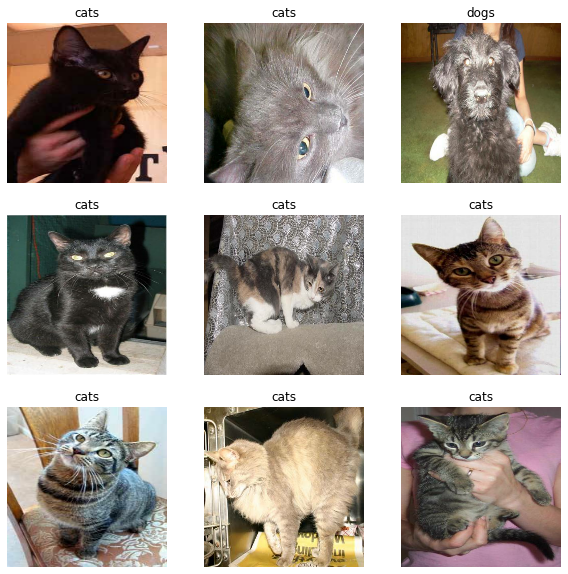

In [8]:
class_names = train_dataset.class_names

# 准备画图
plt.figure(figsize=(10, 10))

# 查看数据
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### 从验证集移除20%的数据到测试集中

In [9]:
# 分离出验证集batch的个数
val_batches = tf.data.experimental.cardinality(validation_dataset)

# 取出5份，即验证集的20%作为测试集
test_dataset = validation_dataset.take(val_batches // 5)

# 验证集保留80%
validation_dataset = validation_dataset.skip(val_batches // 5)

In [10]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


### 高性能读取数据的方法

In [8]:
# 从数据集中预先取出数据，取出的数据量进行动态调整
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

### 简单的数据增强

In [9]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'), # 翻转
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2), # 旋转
])

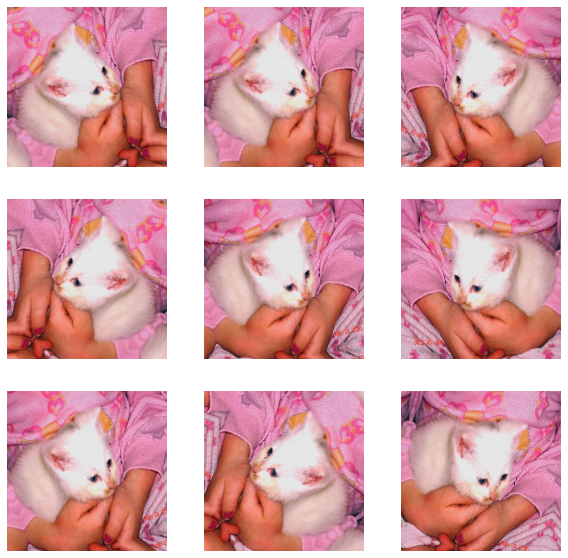

In [10]:
# 展示数据增强的结果
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

### MobileNet 模型实现
- 论文地址 https://arxiv.org/abs/1704.04861
- 轻量级网络，虽然准确率低一些，但是参数真的很少很少

![caption](img/2.png)

### 获取预训练模型对输入的预处理方法

In [11]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

### 数据标准化

In [12]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1) # 范围变成[-1, 1]

### 创建预训练模型

In [13]:
# 输入维度为（160，160，3）
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, # 是否包含顶层的全连接层
                                               weights='imagenet') # 加载权重

In [14]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### 查看数据 特征提取器 160x160x3 image 转化成 5x5x1280 

In [15]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


### 冻结参数

In [16]:
base_model.trainable = False

### 查看模型

In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

### 利用平均池化做特征提取
- 没有pool_size, strides
- GlobalAveragePooling2D最后返回的tensor是（batch_size, channels）两个维度的。

In [18]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


### 输出一个维度 0~1做逻辑判断

In [19]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


### 迁移学习主流程代码，开始利用预训练的MobileNet创建模型

In [20]:
# 输入层
inputs = tf.keras.Input(shape=(160, 160, 3))
# 数据增强
x = data_augmentation(inputs)
# 数据预处理
x = preprocess_input(x)
# 模型
x = base_model(x, training=False)
# 全局池化
x = global_average_layer(x)
# Dropout
x = tf.keras.layers.Dropout(0.2)(x)
# 输出层
outputs = prediction_layer(x)
# 整体封装
model = tf.keras.Model(inputs, outputs)

### 编译模型，添加学习率，优化器，损失函数，评价方式

In [21]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # 输出没有经过激活函数，计算logit值
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

### 需要训练的参数 w(1) + b(1)

In [23]:
len(model.trainable_variables)

2

### 配置epochs次数和验证方式

In [24]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

26/26 [==============================] - 14s 469ms/step - loss: 0.7772 - accuracy: 0.5028


In [25]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.79
initial accuracy: 0.48


### 开始训练

In [26]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 48s 728ms/step - loss: 0.7328 - accuracy: 0.5490 - val_loss: 0.5478 - val_accuracy: 0.6485
Epoch 2/10
63/63 [==============================] - 46s 727ms/step - loss: 0.5520 - accuracy: 0.6840 - val_loss: 0.3880 - val_accuracy: 0.7710
Epoch 3/10
63/63 [==============================] - 46s 728ms/step - loss: 0.4360 - accuracy: 0.7755 - val_loss: 0.3024 - val_accuracy: 0.8540
Epoch 4/10
63/63 [==============================] - 46s 726ms/step - loss: 0.3647 - accuracy: 0.8160 - val_loss: 0.2539 - val_accuracy: 0.8886
Epoch 5/10
63/63 [==============================] - 46s 725ms/step - loss: 0.3175 - accuracy: 0.8545 - val_loss: 0.2093 - val_accuracy: 0.9208
Epoch 6/10
63/63 [==============================] - 46s 725ms/step - loss: 0.2808 - accuracy: 0.8695 - val_loss: 0.1853 - val_accuracy: 0.9319
Epoch 7/10
63/63 [==============================] - 46s 730ms/step - loss: 0.2602 - accuracy: 0.8875 - val_loss: 0.1623 - val_accuracy: 0.9431

### 拟合情况展示图形展示

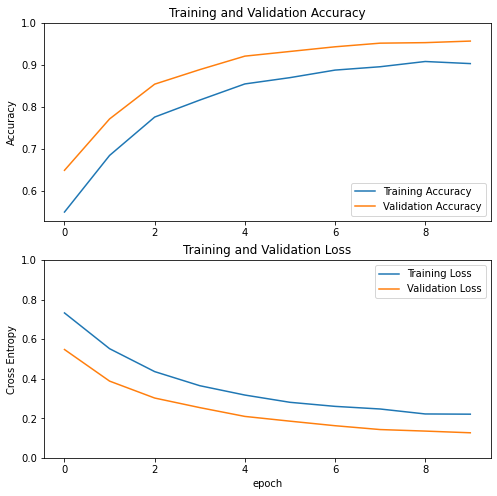

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
loss1, accuracy1 = model.evaluate(test_dataset)
print("test loss: {:.2f}".format(loss1))
print("test accuracy: {:.2f}".format(accuracy1))

6/6 [==============================] - 3s 478ms/step - loss: 0.1389 - accuracy: 0.9531
test loss: 0.14
test accuracy: 0.95


### Fine tuning 微调

In [29]:
base_model.trainable = True

### 模型一共154层，对最后54层进行微调

In [30]:
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  154


In [31]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [32]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [33]:
len(model.trainable_variables)

56

### 迭代式微调训练

In [34]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1], # 基于之前的模型，从第10轮开始训练
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 64s 956ms/step - loss: 0.1921 - accuracy: 0.9187 - val_loss: 0.0509 - val_accuracy: 0.9814
Epoch 11/20
63/63 [==============================] - 61s 963ms/step - loss: 0.1367 - accuracy: 0.9400 - val_loss: 0.0620 - val_accuracy: 0.9827
Epoch 12/20
63/63 [==============================] - 61s 968ms/step - loss: 0.1274 - accuracy: 0.9465 - val_loss: 0.0434 - val_accuracy: 0.9827
Epoch 13/20
63/63 [==============================] - 61s 971ms/step - loss: 0.0990 - accuracy: 0.9595 - val_loss: 0.0428 - val_accuracy: 0.9876
Epoch 14/20
63/63 [==============================] - 61s 961ms/step - loss: 0.0903 - accuracy: 0.9726 - val_loss: 0.0403 - val_accuracy: 0.9827
Epoch 15/20
63/63 [==============================] - 61s 969ms/step - loss: 0.0779 - accuracy: 0.9653 - val_loss: 0.0351 - val_accuracy: 0.9851
Epoch 16/20
63/63 [==============================] - 61s 971ms/step - loss: 0.0901 - accuracy: 0.9662 - val_loss: 0.0407 - val_accuracy:

In [35]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

### 画图观测两次收敛状态

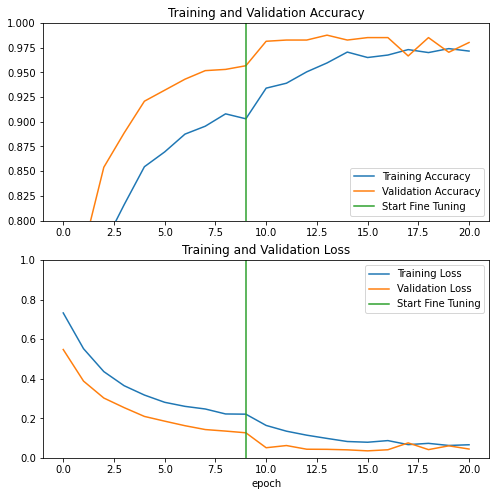

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 查看测试集结果

In [37]:
loss, accuracy = model.evaluate(test_dataset)
print("test loss: {:.2f}".format(loss))
print("test accuracy: {:.2f}".format(accuracy))

6/6 [==============================] - 3s 477ms/step - loss: 0.0744 - accuracy: 0.9583
test loss: 0.07
test accuracy: 0.96


### 最后验证下实际效果

Predictions:
 [0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0]
Labels:
 [0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0]


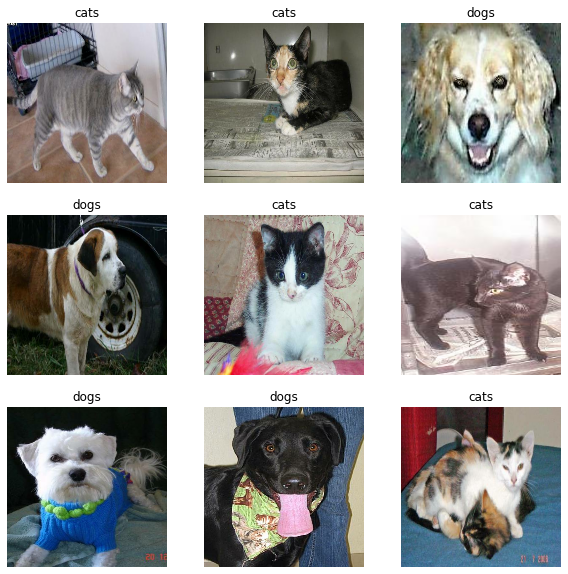

In [38]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

## 反卷积

- 反向金字塔
<img src="./img/10.png" alt="FAO" width="600">

## 可分离卷积

- 正常卷积  一个卷积核
<img src="./img/4.png" alt="FAO" width="600">
- 正常卷积  256个卷积核
<img src="./img/5.png" alt="FAO" width="600">

##### 三个过程
- 1、对每个颜色通道进行 分离 然后实现卷积
<img src="./img/6.png" alt="FAO" width="600">
- 2、将分离后的卷积后的结果 合并在一起 再进行卷积 
<img src="./img/7.png" alt="FAO" width="600">
- 3、有256个这样的卷积核
<img src="./img/8.png" alt="FAO" width="600">


# 反卷积和可分离卷积实现

In [39]:
from tensorflow import keras

In [40]:
model = keras.models.Sequential()

# 第一层可分离卷积层
model.add(keras.layers.SeparableConv2D(filters = 32,    # 卷积核数量
                              kernel_size = 3,          # 卷积核尺寸
                              padding = 'same',         # padding补齐，让卷积之前与之后的大小相同
                              activation = 'relu',      # 激活函数relu
                              input_shape = (28, 28, 1))) # 输入维度是1通道的28*28

# 第二层可分离卷积层
model.add(keras.layers.SeparableConv2D(filters = 32,             
                              kernel_size = 3,          
                              padding = 'same',         
                              activation = 'relu'))      
                              
# 最大池化层
model.add(keras.layers.MaxPool2D(pool_size=2))


# 第三层卷积层
model.add(keras.layers.SeparableConv2D(filters = 64,           
                              kernel_size = 3,          
                              padding = 'same',         
                              activation = 'relu'))      
          
# 第四层卷积层
model.add(keras.layers.SeparableConv2D(filters=128, strides=(2, 2),             
                              kernel_size = 3,          
                              padding = 'same',        
                              activation = 'relu'))     
 
# 最大池化层
model.add(keras.layers.MaxPool2D(pool_size = 2))


# 反卷积层
model.add(keras.layers.Conv2DTranspose(filters=128, strides=(2, 2),       
                              kernel_size = 3,          
                              padding = 'same',       
                              activation = 'relu')) 

# 反卷积层
model.add(keras.layers.Conv2DTranspose(filters=128, strides=(2, 2),                 
                              kernel_size = 3,          
                              padding = 'same',         
                              activation = 'relu')) 

# 全连接层
model.add(keras.layers.Flatten())  # 展平输出
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = "softmax")) # 输出为 10的全连接层

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 28, 28, 32)        73        
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 28, 28, 32)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 14, 14, 64)        2400      
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 7, 7, 128)         8896      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 6, 6, 128)        